# Anotomical Association Wormbase WP266

Author: Zachary Flamholz  
Date: 07-2018  
Database: https://wormbase.org/#012-34-5  
Data: ftp://ftp.wormbase.org/pub/wormbase/releases/WS266/ONTOLOGY/anatomy_association.WS266.wb, ftp://ftp.wormbase.org/pub/wormbase/releases/WS266/ONTOLOGY/anatomy_ontology.WS266.obo  

# Versions of modules in use

In [3]:
%load_ext version_information
%version_information numpy, pandas

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.5
pandas 0.23.1
Mon Jul 30 13:13:20 2018 EDT

## load libraries

In [64]:
import pandas as pd
import numpy as np
import sys, datetime
import networkx
import obonet
import goenrich
import matplotlib as mat
from matplotlib import pyplot as py

## read in data

In [334]:
wb_anatomy = pd.read_csv('in_production/anatomy_association.WS266.wb', sep='\t', header=None)

In [335]:
wb_anatomy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,WB,WBGene00000001,aap-1,Certain,WBbt:0003679,WB_REF:WBPaper00005614,IDA,WB:Expr2275,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
1,WB,WBGene00000001,aap-1,Enriched,WBbt:0003679,WB_REF:WBPaper00030839,IDA,WB:WBPaper00030839:Larval_Pan_Neuronal,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
2,WB,WBGene00000001,aap-1,Uncertain,WBbt:0005733,WB_REF:WBPaper00005614,IDA,WB:Expr2275,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
3,WB,WBGene00000001,aap-1,Certain,WBbt:0005772,WB_REF:WBPaper00005614,IDA,WB:Expr2275,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
4,WB,WBGene00000001,aap-1,Enriched,WBbt:0005784,WB_REF:WBPaper00051039,IDA,WB:WBPaper00051039:germline_enriched,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN


In [336]:
wb_anatomy.shape

(146621, 17)

In [337]:
len(wb_anatomy.iloc[:,6].unique())

1

In [338]:
len(wb_anatomy.iloc[:,7].unique())

11438

In [339]:
wb_anatomy.iloc[:,12].unique()

array(['taxon:6239'], dtype=object)

In [340]:
wb_anatomy.iloc[:,3].unique()

array(['Certain', 'Enriched', 'Uncertain', nan, 'Partial'], dtype=object)

In [341]:
wb_anatomy = wb_anatomy.dropna(subset=[3])

In [342]:
wb_anatomy_cut = wb_anatomy[wb_anatomy.iloc[:,3] != 'Uncertain']

In [343]:
wb_anatomy_cut = wb_anatomy_cut[wb_anatomy_cut.iloc[:,3] != 'Partial']
wb_anatomy_cut = wb_anatomy_cut[wb_anatomy_cut.iloc[:,3] != 'Enriched']

In [344]:
wb_anatomy_cut.iloc[:,3].unique()

array(['Certain'], dtype=object)

In [345]:
wb_anatomy_cut.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,WB,WBGene00000001,aap-1,Certain,WBbt:0003679,WB_REF:WBPaper00005614,IDA,WB:Expr2275,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
3,WB,WBGene00000001,aap-1,Certain,WBbt:0005772,WB_REF:WBPaper00005614,IDA,WB:Expr2275,A,NaN,Y110A7A.10,gene,taxon:6239,20180609,WB,NaN,NaN
55,WB,WBGene00000007,aat-6,Certain,WBbt:0005772,WB_REF:WBPaper00041455,IDA,WB:Expr10567,A,NaN,T11F9.4,gene,taxon:6239,20180609,WB,NaN,NaN
65,WB,WBGene00000012,abf-1,Certain,WBbt:0003681,WB_REF:WBPaper00005130,IDA,WB:Expr1810,A,NaN,C50F2.9,gene,taxon:6239,20180609,WB,NaN,NaN
67,WB,WBGene00000012,abf-1,Certain,WBbt:0005772,WB_REF:WBPaper00029438,IDA,WB:Expr4720,A,NaN,C50F2.9,gene,taxon:6239,20180609,WB,NaN,NaN


In [346]:
wb_anatomy_cut.shape

(37478, 17)

In [347]:
len(wb_anatomy_cut.iloc[:,4].unique())

2361

## get the ontologies for phenotypes

In [348]:
graph = obonet.read_obo('in_production/anatomy_ontology.WS266.obo')
term_data = graph.nodes(data=True)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [349]:
type(term_data)

networkx.classes.reportviews.NodeDataView

## assign a level to each term

In [350]:
paths_for_nodes = {}
levels = {}
for node in graph.nodes():
    if node != 'WBbt:0000100':
        paths_for_nodes[node] = networkx.all_simple_paths(graph, node, 'WBbt:0000100')
        levels[node] = len(min(list(paths_for_nodes[node]), key=len))

levels['WBbt:0000100']  =1

In [351]:
levels['WBbt:0005772']

4

(array([1.000e+00, 6.000e+00, 2.995e+03, 0.000e+00, 2.204e+03, 9.120e+02,
        0.000e+00, 5.040e+02, 1.790e+02, 7.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

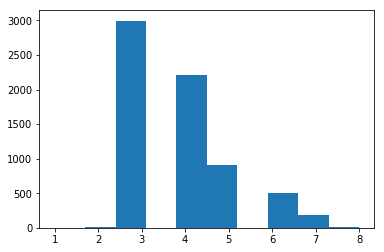

In [352]:
py.hist(levels.values())

In [353]:
for i in graph.predecessors('WBbt:0006864'):
    print(i)

WBbt:0005063
WBbt:0005064


In [354]:
term_data['WBbt:0006906']['is_a']

['WBbt:0005733', 'WBbt:0005757']

In [355]:
sys.setrecursionlimit(3000)

## build dictionary of dieases and associated genes, recursively move up the ontology tree 

In [356]:
## only recur using the 'is_a' tag, which seems to dentote term parent and not lineage
anatomies = {}

def recurUp(nodes, gene):
    for n in nodes:
        
        if 'is_a' in term_data[n].keys():
            recurUp(term_data[n]['is_a'], gene)
        
        if n in anatomies.keys():
            anatomies[n].append(gene)
        else:
            anatomies[n] = [gene]
        

for i in range(0, len(wb_anatomy_cut)):

    p = wb_anatomy_cut.iloc[i, 4]
    g = wb_anatomy_cut.iloc[i,2]
    
    if p in anatomies.keys():
        anatomies[p].append(g)
    else:
        anatomies[p] = [g]
    
    if 'is_a' in term_data[p].keys():
        recurUp(term_data[p]['is_a'], g)
        
        

## build gmt

In [362]:
filename = 'anatomy_wormbase_%s.gmt'% str(datetime.date.today())[0:7].replace('-', '_')
file = open(filename,'w+') 
terms = anatomies.keys()
term_sizes = []

levels_large = []


for i,term in enumerate(terms):
    
    if len(set(anatomies[term])) > 4:
        if levels[term] > 3:
            name = term_data[term]['name'] + '(' + term + ')'
            file.write("%s\t" % name)
            file.write("\t")
            genes = set(anatomies[term])
            term_sizes.append(len(set(anatomies[term])))
    
            for gene in genes:
                  file.write("%s\t" % gene)
            file.write("\n")
        
            if len(set(anatomies[term])) > 500:
                levels_large.append(levels[term])
                
        
        
        
        
        
file.close()

In [358]:
len(anatomies['WBbt:0005772'])

1450

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <a list of 10 Patch objects>)

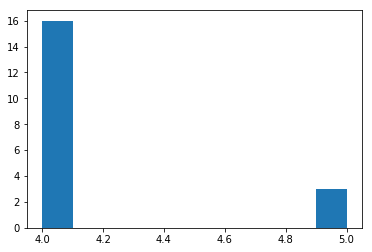

In [359]:
py.hist(levels_large)

(array([994.,  29.,  10.,   8.,   7.,   3.,   6.,   0.,   2.,   2.]),
 array([   5. ,  124.6,  244.2,  363.8,  483.4,  603. ,  722.6,  842.2,
         961.8, 1081.4, 1201. ]),
 <a list of 10 Patch objects>)

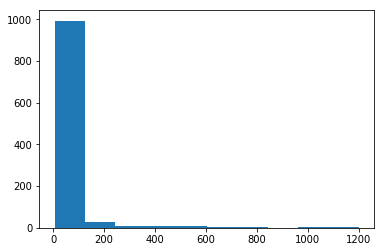

In [360]:
py.hist(term_sizes)